In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df=pd.read_csv('energydata_complete.csv')


Since UCI is lately not working well, here is the kaggle dataset - https://www.kaggle.com/code/callherro/energy-data/input

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# converting the date object into datetime format
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)

Note: infer_datetime_format : boolean, default False

If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the parsing speed by 5-10x.

Essentially, Pandas deduces the format of your datetime from the first element(s) and then assumes all other elements in the series will use the same format. This means Pandas does not need to check multiple formats when attempting to convert a string to datetime.

Remember, CSV files can only hold textual data, so a conversion to datetime (essentially a numeric type) will always be required.

so it's faster than df['date']=pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

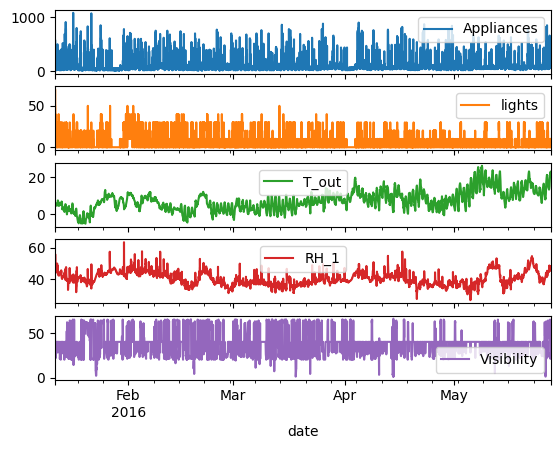

In [8]:
df.set_index('date')[['Appliances','lights','T_out','RH_1','Visibility']].plot(subplots=True)
# setting date as index, and picking up specific columns for plotting

In [9]:
df_input=df[['Appliances','T_out','RH_1','Visibility']] # another dataframe, with selected columns

In [10]:
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [11]:
df_input.describe() # to understand the distribution

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [12]:
# there are some outliers in the appliances column as we can see 75% is at 100, and max is at 1080
df_input.query("Appliances>500")

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


In [13]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [14]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [15]:
features=data_scaled
target=data_scaled[:,0] # target is the 0th column

Appliances is the input as well as the target column, target would be the future prediction of appliances, using the past data of all columns (including appliances).

In [16]:
TimeseriesGenerator(features, target, length=5, sampling_rate=1, batch_size=1)[0] #window length=2, two time periods=10x2mins
# larger batch_size is better

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872]]]),
 array([0.03738318]))

The first 5 are the input and the last is the prediction

In [17]:
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.173, random_state=123, shuffle=False)
# if shuffle is True, then ordering would be different

In [18]:
x_train.shape

(16320, 4)

In [19]:
x_test.shape

(3415, 4)

Above window length was just for sample.

In [20]:
win_length=864 # 864/144=72 = 6 days of data points, using this we predict the next one
batch_size=32 #train to be faster, each training instance we pass 32 instances
num_features=4 # the variables
train_generator =TimeseriesGenerator(x_train,y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator =TimeseriesGenerator(x_test,y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [21]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.2170418 , 0.23676727, 0.6       ],
         [0.06542056, 0.20685959, 0.23878543, 0.6       ],
         [0.06542056, 0.19667738, 0.23575819, 0.6       ]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.06542056, 0.20685959, 0.23878543, 0.6       ],
         [0.06542056, 0.19667738, 0.23575819, 0.6       ],
         [0.07476636, 0.18649518, 0.23575819, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.19667738, 0.23575819, 0.6       ],
        

32 target columns would be there

In [22]:
# building the model architecture

model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True)) # true as we want to feed that sequence into another LSTM unit
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) #activation layer
model.add(tf.keras.layers.LSTM(128,  return_sequences=True))# true as we want to feed that sequence into another LSTM unit
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3)) # to avoid overfitting
model.add(tf.keras.layers.LSTM(64,  return_sequences=False))# false as we don't want to feed it into another LSTM unit
# we can also have it true and then flatten it, and then have a dense layer
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1)) # 1 as we want 1 output

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 864, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 864, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 864, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 864, 128)          0         
                                                                 
 dropout (Dropout)           (None, 864, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [24]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(loss='mse', optimizer='adam', metrics= [tf.metrics.MeanAbsoluteError()])
# loss=tf.losses.MeanSquaredError()

In [25]:
history=model.fit_generator(train_generator, epochs=50,validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


<ipython-input-25-e1ade86b2a6d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, epochs=50,validation_data=test_generator, shuffle=False, callbacks=[early_stopping])


483/483 [==============================] - 56s 85ms/step - loss: 0.0082 - mean_absolute_error: 0.0500 - val_loss: 0.0058 - val_mean_absolute_error: 0.0314
Epoch 2/50
483/483 [==============================] - 40s 83ms/step - loss: 0.0062 - mean_absolute_error: 0.0408 - val_loss: 0.0044 - val_mean_absolute_error: 0.0314
Epoch 3/50
483/483 [==============================] - 40s 84ms/step - loss: 0.0044 - mean_absolute_error: 0.0335 - val_loss: 0.0036 - val_mean_absolute_error: 0.0281
Epoch 4/50
483/483 [==============================] - 40s 84ms/step - loss: 0.0041 - mean_absolute_error: 0.0313 - val_loss: 0.0034 - val_mean_absolute_error: 0.0258
Epoch 5/50
483/483 [==============================] - 40s 84ms/step - loss: 0.0040 - mean_absolute_error: 0.0309 - val_loss: 0.0034 - val_mean_absolute_error: 0.0261
Epoch 6/50
483/483 [==============================] - 41s 84ms/step - loss: 0.0040 - mean_absolute_error: 0.0303 - val_loss: 0.0033 - val_mean_absolute_error: 0.0255
Epoch 7/50
483/

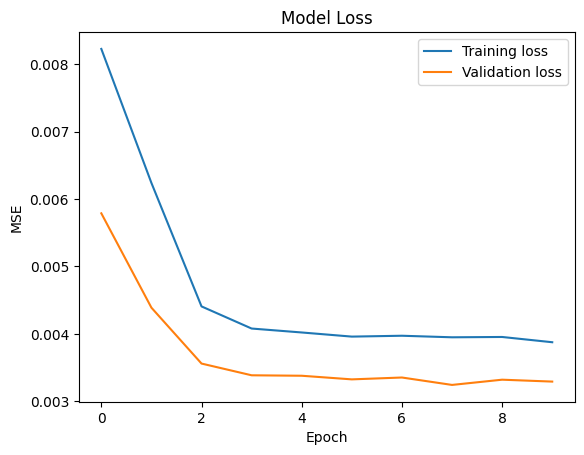

In [43]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

In [26]:
model.evaluate_generator(test_generator, verbose=0) #
predictions=model.predict_generator(test_generator)

<ipython-input-26-5c7b9c40b8ef>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0) #
<ipython-input-26-5c7b9c40b8ef>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [27]:
predictions.shape[0] # difference of 720, as it takes first 720 to predict the next, the window length

2551

In [28]:
predictions # scaled predictions

array([[0.03275602],
       [0.03310714],
       [0.03415748],
       ...,
       [0.06928927],
       [0.277211  ],
       [0.2829817 ]], dtype=float32)

In [29]:
y_test

array([0.04672897, 0.03738318, 0.04672897, ..., 0.24299065, 0.38317757,
       0.39252336])

In [30]:
x_test

array([[0.04672897, 0.29903537, 0.23052931, 0.6       ],
       [0.03738318, 0.29742765, 0.23052931, 0.6       ],
       [0.04672897, 0.29581994, 0.232364  , 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [31]:
x_test[:,1:][win_length:]

array([[0.68488746, 0.44766535, 0.6       ],
       [0.68220793, 0.44766535, 0.55128205],
       [0.6795284 , 0.44766535, 0.5025641 ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [34]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1)

In [35]:
rev_trans=scaler.inverse_transform(df_pred)

In [36]:
rev_trans

array([[ 45.04894074,  16.3       ,  43.29      ,  40.        ],
       [ 45.42463891,  16.21666667,  43.29      ,  36.83333333],
       [ 46.54850472,  16.13333333,  43.29      ,  33.66666667],
       ...,
       [ 84.13952373,  22.46666667,  46.59666667,  25.33333333],
       [306.61578119,  22.33333333,  46.99      ,  26.16666667],
       [312.79041231,  22.2       ,  46.6       ,  27.        ]])

In [37]:
df_final=df_input[predictions.shape[0]*-1:]

In [38]:
df_final.count()

Appliances    2551
T_out         2551
RH_1          2551
Visibility    2551
dtype: int64

In [40]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-40-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [41]:
df_final

,Appliances,T_out,RH_1,Visibility,App_Pred
17184,50,16.300000,43.290000,40.000000,45.048941
17185,50,16.216667,43.290000,36.833333,45.424639
17186,50,16.133333,43.290000,33.666667,46.548505
17187,60,16.050000,43.363333,30.500000,48.099353
17188,50,15.966667,43.400000,27.333333,60.510647
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,86.666814
19731,90,22.600000,46.500000,24.500000,105.903311
19732,270,22.466667,46.596667,25.333333,84.139524
19733,420,22.333333,46.990000,26.166667,306.615781


<Axes: >

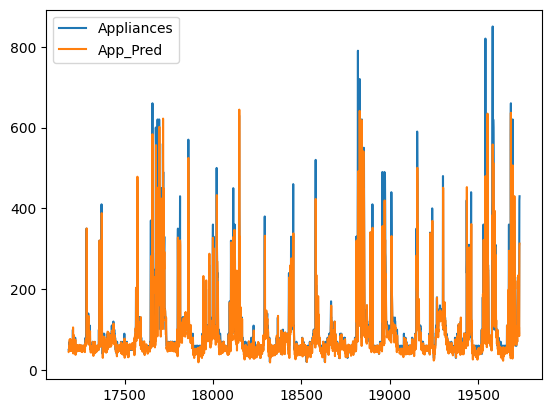

In [42]:
df_final[['Appliances','App_Pred']].plot()